<a href="https://colab.research.google.com/github/MeanJun/MusicGenre/blob/main/Genre_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import neural_network
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

df = pd.read_csv("/content/ML_Project_Frequency_Distributions.csv")
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                 Title            0  \
0                                  10-abbey_rhodes.mp3      1043621   
1                     10-at_least_you've_been_told.mp3      2126883   
2               10-brilliant_day_(eine_kleine_mix).mp3      3638673   
3                      10-carefully_watch_the_news.mp3      2498355   
4                        10-echoes_of_the_big_bang.mp3  12633950144   
...                                                ...          ...   
1428                somewhere-in-the-clouds-184456.wav       230115   
1429                          soul-of-dubai-165180.wav     43787068   
1430  tamil-comedy-bgm-for-reels-and-shorts-139304.wav      1920438   
1431                  the-girl-from-ireland-177450.wav     74765199   
1432                            the-ramadan-188837.wav    559262022   

               200

In [4]:
#display(df['200'])
#display(df.iloc[1])

y = df['Genre']

Xi = []
for column_name in df.columns:
  if '0' in column_name:
    Xi.append(column_name)

X = df[Xi]
display(X)

,0,200,400,600,800,1000,1200,1400,1600,1800,...,18000,18200,18400,18600,18800,19000,19200,19400,19600,19800
0,1043621,6.174077e+07,2.047628e+08,3.878327e+08,43762172.30,4.884440e+06,1.731180e+07,6.923562e+06,1.728419e+06,1.097927e+07,...,2384.000186,2411.610402,1754.836694,1913.843566,2566.356447,1166.833088,753.321428,2477.249148,1230.352088,788.631319
1,2126883,1.391849e+08,8.998469e+07,1.171315e+08,79548896.75,3.387833e+07,3.675010e+07,4.422236e+07,1.228403e+07,9.543494e+06,...,24912.923230,19561.752830,49134.077460,23466.887240,6684.936444,83976.038140,5681.113413,16540.174520,26777.469810,39033.317830
2,3638673,7.667548e+06,1.335264e+07,1.898063e+07,22041971.77,5.892001e+06,9.928671e+05,2.514030e+06,2.312663e+07,2.726887e+06,...,1808.905693,1754.348879,2380.075771,2799.921865,2397.215117,3060.009491,2120.585649,2372.546729,2653.544784,1731.706378
3,2498355,2.452500e+08,6.596359e+07,9.187554e+07,52900587.70,2.163944e+07,5.459262e+07,2.057038e+07,1.404666e+07,6.839765e+06,...,8720.719579,7984.793342,9126.964638,4856.855111,7473.337512,9129.491911,6973.661419,8691.579700,8577.869889,8380.539834
4,12633950144,2.344230e+07,7.651874e+07,9.061877e+06,88275540.13,2.283532e+06,4.892226e+07,9.276679e+06,5.144914e+07,2.932875e+06,...,73223.639630,18513.552650,34590.849930,26508.658900,71477.055680,13465.560970,91316.783600,35046.101910,31169.952770,40243.379180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,230115,2.658727e+07,2.008053e+08,6.485656e+07,53583334.57,7.993349e+06,4.649832e+07,1.456040e+07,3.830695e+07,3.027184e+07,...,533.228466,664.226145,1012.785569,1227.141176,644.967497,931.464923,481.317277,344.487630,813.793171,824.823032
1429,43787068,1.189417e+08,1.027792e+08,2.297040e+07,56467480.46,5.331166e+06,9.156309e+07,1.186552e+07,5.494317e+07,8.816054e+06,...,5530.530466,4087.916622,7565.595333,3996.340023,2339.546788,6890.781898,4063.788977,7660.720919,2356.332830,10498.729370
1430,1920438,4.680251e+07,3.979945e+07,2.050838e+07,19509767.05,2.961714e+06,1.239209e+07,3.078131e+06,6.683750e+06,5.243632e+06,...,1373.543878,10567.028430,9018.496753,8845.084532,5592.151900,4841.477950,10063.064870,3558.198442,11935.343720,8452.489487
1431,74765199,1.961060e+08,1.069926e+08,1.429322e+07,33945857.30,6.774219e+06,1.097531e+07,2.804238e+06,1.711634e+07,1.848868e+07,...,171.377712,503.120565,1006.387829,693.719941,528.009908,66.748512,965.164054,279.279473,1090.087526,822.759217


In [5]:
Xarray = X.values
Xarray.shape

(1433, 100)

In [6]:
song_maxs = Xarray.max(axis=1).reshape(-1,1)
Xnorm = Xarray / song_maxs

In [7]:
np.allclose(Xnorm[1,:], Xarray[1,:]/Xarray[1].max())

True

In [8]:
Xnorm.shape

(1433, 100)

In [9]:
codes, uniques = y.factorize()
ycodes = codes
uniques

Index(['jazz_blues', 'rock_pop', 'electronic', 'metal_punk', 'classical',
       'world'],
      dtype='object')

In [10]:
# Generate a random array of numbers from 0 to 1432 (randomly chooses our songs)
numbers = np.arange(0, 1432)
np.random.shuffle(numbers)
print(numbers)

[ 716  181 1101 ...  528  784  514]


In [11]:
X_new = np.zeros((1200,100))

ycodes_new_prior = np.zeros((1200,1))

ycodes_new = ycodes_new_prior.flatten()
display(X_new.shape)
display(Xnorm.shape)

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count_overall = 0

#World
for i in range(1432):
    if ycodes[numbers[i]] == 5 and count1 < 200: #will get 100 World songs
      X_new[count_overall] = Xnorm[numbers[i]]
      ycodes_new[count_overall] = ycodes[numbers[i]]
      count1 += 1
      count_overall += 1
#classical
for j in range(1432):
    if ycodes[numbers[j]] == 4 and count2 < 200:
        X_new[count_overall] = Xnorm[numbers[j]]
        ycodes_new[count_overall] = ycodes[numbers[j]]
        count2 += 1
        count_overall += 1
#electronic
for k in range(1432):
    if ycodes[numbers[k]] == 2 and count3 < 200:
        X_new[count_overall] = Xnorm[numbers[k]]
        ycodes_new[count_overall] = ycodes[numbers[k]]
        count3 += 1
        count_overall += 1
#rock_pop
for l in range(1432):
    if ycodes[numbers[l]] == 1 and count4 < 200:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count4 += 1
        count_overall += 1
#jazz_blues
for l in range(1432):
    if ycodes[numbers[l]] == 0 and count5 < 200:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count5 += 1
        count_overall += 1
#metal_punk
for l in range(1432):
    if ycodes[numbers[l]] == 3 and count6 < 200:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count6 += 1
        count_overall += 1


(1200, 100)

(1433, 100)

In [12]:
#New test train split will have 150 train and 50 test songs for each of 6 genres
X_train, X_test, y_train, y_test = train_test_split(X_new, ycodes_new, stratify=ycodes_new, random_state=0)

In [13]:
X_train.shape

(900, 100)

In [44]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(5,5),max_iter=10000, random_state=42)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
display(clf.score(X_test, y_test))

0.5488888888888889


0.36333333333333334

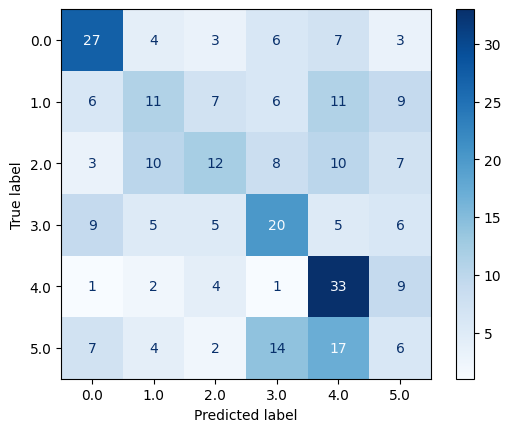

In [15]:
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [16]:
clf2 = GaussianNB()
clf2.fit(X_train,y_train)
display(clf2.score(X_train,y_train))
display(clf2.score(X_test,y_test))

0.3466666666666667

0.30333333333333334

In [17]:
clf5 = SVC()
clf5.fit(X_train,y_train)
display(clf5.score(X_train,y_train))
display(clf5.score(X_test,y_test))

0.4477777777777778

0.33

In [98]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#(X_train, y_train),(X_test, y_test) = mnist.load_data()
#X_train, X_test = X_train / 255.0, X_test / 255.0

num_features = X_train.shape[1] #100
num_classes = 6
# Set a seed value
seed_value = 12345

# Set the seed for the Python random number generator
np.random.seed(seed_value)

# Set the seed for the TensorFlow backend
tf.random.set_seed(seed_value)
model = tf.keras.models.Sequential([
   #tf.keras.layers.Conv1D(8, 3, activation='relu', input_shape=(num_features, 1)),
    #tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=60)
model.evaluate(X_test, y_test)


Epoch 1/60
29/29 [==============================] - 1s 3ms/step - loss: 1.7815 - accuracy: 0.1933
Epoch 2/60
29/29 [==============================] - 0s 4ms/step - loss: 1.7469 - accuracy: 0.2444
Epoch 3/60
29/29 [==============================] - 0s 4ms/step - loss: 1.7197 - accuracy: 0.2911
Epoch 4/60
29/29 [==============================] - 0s 2ms/step - loss: 1.6974 - accuracy: 0.3356
Epoch 5/60
29/29 [==============================] - 0s 2ms/step - loss: 1.6744 - accuracy: 0.3378
Epoch 6/60
29/29 [==============================] - 0s 2ms/step - loss: 1.6569 - accuracy: 0.3400
Epoch 7/60
29/29 [==============================] - 0s 2ms/step - loss: 1.6389 - accuracy: 0.3556
Epoch 8/60
29/29 [==============================] - 0s 3ms/step - loss: 1.6245 - accuracy: 0.3578
Epoch 9/60
29/29 [==============================] - 0s 2ms/step - loss: 1.6069 - accuracy: 0.3667
Epoch 10/60
29/29 [==============================] - 0s 2ms/step - loss: 1.5892 - accuracy: 0.3822
Epoch 11/60
29/29 [

[1.5834112167358398, 0.43666666746139526]

10/10 [==============================] - 0s 2ms/step
[[0.11748074 0.3183906  0.15309066 0.15716691 0.04093507 0.21293607]
 [0.25368178 0.15183182 0.12186812 0.06159348 0.10091315 0.31011155]
 [0.02792971 0.09201109 0.8177584  0.03052715 0.0056201  0.02615355]
 ...
 [0.11128831 0.16601866 0.2453718  0.08439951 0.1004949  0.29242685]
 [0.4217295  0.11682875 0.06664201 0.23684672 0.00721425 0.15073879]
 [0.31305715 0.16565374 0.31692547 0.06697705 0.01930094 0.1180857 ]]
[1, 5, 2, 4, 3, 2, 0, 1, 5, 0, 4, 1, 0, 5, 0, 0, 5, 0, 1, 4, 4, 1, 4, 5, 2, 2, 4, 4, 1, 3, 4, 1, 1, 3, 1, 4, 2, 4, 1, 5, 0, 4, 4, 4, 1, 3, 4, 0, 4, 4, 3, 0, 4, 0, 0, 3, 3, 2, 1, 2, 0, 2, 0, 3, 0, 1, 4, 1, 5, 4, 2, 3, 0, 4, 3, 5, 2, 0, 3, 0, 3, 1, 3, 2, 4, 4, 4, 2, 4, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4, 2, 5, 1, 0, 2, 2, 4, 3, 2, 0, 0, 3, 3, 1, 1, 3, 4, 1, 2, 0, 5, 0, 0, 2, 3, 4, 5, 5, 0, 3, 1, 3, 5, 3, 3, 5, 4, 2, 2, 3, 3, 2, 5, 1, 2, 4, 2, 2, 3, 4, 5, 5, 2, 0, 0, 3, 2, 4, 4, 3, 5, 2, 4, 1, 4, 2, 2, 3, 0, 4, 4, 3, 4, 2, 1, 3, 1

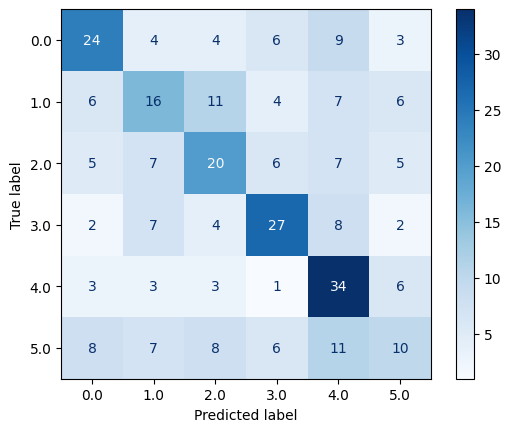

In [99]:
y_pred = model.predict(X_test)
y_pred.shape
y_pred_final = []
print(y_pred)
for i in range(300):
  max = 0.
  index = 0
  for j in range(6):
    if y_pred[i,j] >= max:
      max = y_pred[i,j]
      index = j
  y_pred_final.append(index)
print(y_pred_final)


print("[jazz_blues, rock_pop, electronic, metal_punk, classical,world]")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, cmap='Blues')
plt.show()
